In [1]:
'''
    This function will be used for
    -   taking a dataset in
    -   temporary removal of all targets
    -   and analyzing orthogonality with PCA decomposition
'''
#imports
import pandas as pd
import numpy as np

#read in data - NOTE changeable name
data = pd.read_csv('betaset_tmp.csv')

#remove all targets - NOTE current solution, may change
data = data.drop(columns=[f't_{i}' for i in range(1,61)])

In [2]:
#introduce PCA

from sklearn.decomposition import PCA
pca = PCA()

#normalize before PCA utilization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

#fit scaler
X_normalized = scaler.fit_transform(data)
#fit pca
X = pca.fit_transform(X_normalized)

#print(pca.get_covariance()) #optional printout, buggy in jn

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.69053341e-01 1.71581155e-01 1.29328446e-01 1.07769318e-01
 8.53283302e-02 3.84991820e-02 2.45585947e-02 1.69531684e-02
 1.47225469e-02 1.14536669e-02 1.01697811e-02 6.34433838e-03
 5.90893309e-03 5.15451612e-03 4.24309738e-03 3.68386769e-03
 3.36647607e-03 2.77136447e-03 2.48042697e-03 2.31347004e-03
 2.28678184e-03 2.06482009e-03 1.97184517e-03 1.84687686e-03
 1.72099986e-03 1.60594695e-03 1.56766205e-03 1.52469287e-03
 1.44783046e-03 1.40551824e-03 1.35540732e-03 1.30998859e-03
 1.30333329e-03 1.25785183e-03 1.20750496e-03 1.18309244e-03
 1.16743701e-03 1.15585400e-03 1.13870190e-03 1.12072452e-03
 1.11638499e-03 1.10643655e-03 1.10014157e-03 1.08917613e-03
 1.08273436e-03 1.07778568e-03 1.07004780e-03 1.06200573e-03
 1.05601400e-03 1.05199095e-03 1.04886977e-03 1.04452209e-03
 1.04296115e-03 1.03774083e-03 1.02950335e-03 1.02116829e-03
 1.01914232e-03 1.01410834e-03 1.01087087e-03 1.00358724e-03
 1.00224931e-03 9.99197515e-04 9.94612589e-04 9.91310706e-04
 9.90392875e-04 9.872218

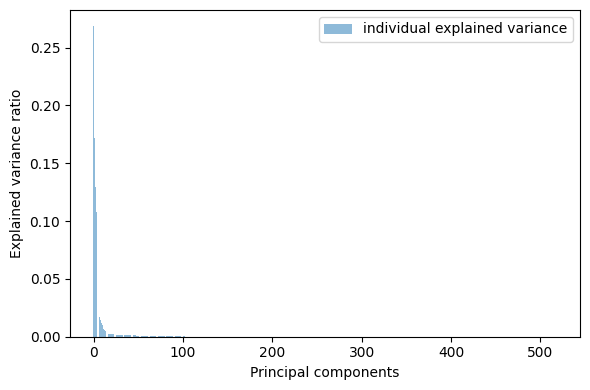

In [3]:
import matplotlib.pyplot as plt

#plot current info collection

plt.figure(figsize=(6, 4))

plt.bar(range(X.shape[1]), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Working with 519 features



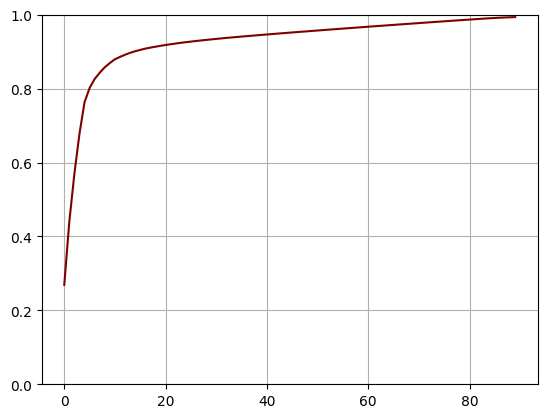

In [4]:
X_normalized = StandardScaler().fit_transform(data)

print(f'Working with {X_normalized.shape[1]} features\n')

dimensionality = 90

data_loss = []
for i in range(dimensionality):
    pca = PCA(n_components = i+1)
    pca.fit(X_normalized)
    X_new = pca.transform(X_normalized)
    retained_variance = np.sum(pca.explained_variance_ratio_)
    data_loss.append(retained_variance)

plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0,1)
plt.show()

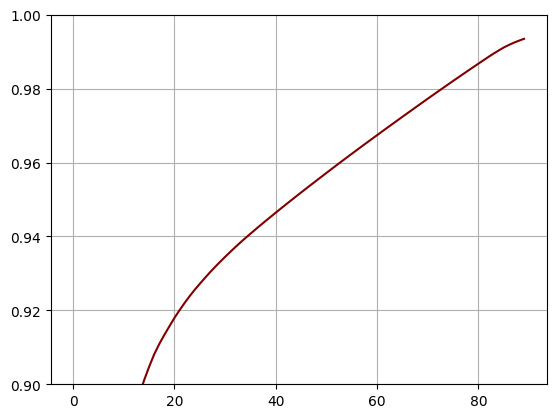

In [5]:
plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0.9,1)
plt.show()